In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage.transform import resize, rescale
%matplotlib inline

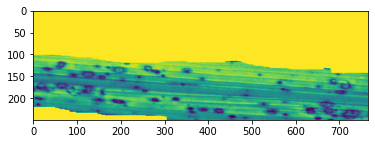

In [2]:
path = r'data2\Brown Spot.2\DSC_0100.jpg'
image = io.imread(path, as_gray = True)
plt.imshow(image)


In [3]:
scaledimg = rescale(image, 0.5)
print(image.shape)
print(scaledimg.shape)

(250, 766)
(125, 383)


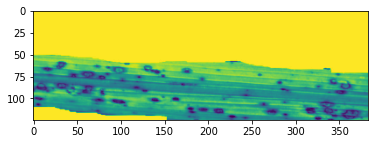

In [4]:
plt.imshow(scaledimg)

In [5]:
import os
os.getcwd()
os.listdir('data2')

['Bacterial Leaf Blight.2', 'Brown Spot.2', 'Leaf smuf.2']

In [6]:
os.listdir('data2\Brown Spot.2')

['DSC_0100.jpg',
 'DSC_0101.jpg',
 'DSC_0105.jpg',
 'DSC_0106.jpg',
 'DSC_0107.jpg',
 'DSC_0108.jpg',
 'DSC_0109.jpg',
 'DSC_0111.jpg',
 'DSC_0112.jpg',
 'DSC_0113.jpg',
 'DSC_0115.jpg',
 'DSC_0117.jpg',
 'DSC_0119.jpg',
 'DSC_0121.jpg',
 'DSC_0292.JPG',
 'DSC_0300.JPG',
 'DSC_0301.JPG',
 'DSC_0303.JPG',
 'DSC_0323.JPG',
 'DSC_0333.JPG']

In [11]:
# image transformation
class Transformation:
    def __init__(self, dirs:list[str]) -> None:
        self.from_path = 'data2'
        self.to_path = 'processed_data2'
        self.dirs = dirs
        self.cls = {dirs[i]: i for i in range(len(dirs))}
        self.image_path = [
            (f'data2\\{dir}\\{img}',f'processed_data2\\{img.split(".")[0]}_{self.cls[dir]}.{img.split(".")[1]}') for dir in self.dirs for img in os.listdir(f'data2\\{dir}')]
        print(len(self.image_path))



    def transformation(self):
        for img, proimg in self.image_path:
            image = io.imread(img, as_gray = True)
            scaledimg = rescale(image, 1/2)
            resizedimg = resize(scaledimg, (228,228))
            io.imsave(proimg, resizedimg)
        return True

In [9]:
for dir in ['Bacterial Leaf Blight.2', 'Brown Spot.2', 'Brown Spot.2']:
    print(f'data2\\{dir}')
  


data2\Bacterial Leaf Blight.2
data2\Brown Spot.2
data2\Brown Spot.2


In [12]:
transformed_img = Transformation(['Bacterial Leaf Blight.2', 'Brown Spot.2', 'Brown Spot.2'])

60


In [13]:
transformed_img.transformation()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

True

Data Modelling

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
images = []
labels = []
for  _ , proimg in transformed_img.image_path:
    image = io.imread(proimg).ravel()/255
    label = int(proimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)
    

In [23]:
images[0]

array([0.84313725, 0.84705882, 0.84705882, ..., 0.85882353, 0.85882353,
       0.85882353])

In [24]:
np_image = np.array(images)

In [25]:
np_image[0]

array([0.84313725, 0.84705882, 0.84705882, ..., 0.85882353, 0.85882353,
       0.85882353])

In [26]:
np_image[:, 0]

array([0.84313725, 0.91372549, 0.85098039, 0.89803922, 0.92156863,
       0.91372549, 0.8627451 , 0.89019608, 0.89019608, 0.91372549,
       0.88627451, 0.90196078, 0.89019608, 0.89019608, 0.91764706,
       0.89803922, 0.89411765, 0.89411765, 1.        , 1.        ,
       1.        , 1.        , 0.27058824, 0.64313725, 1.        ,
       0.72156863, 1.        , 0.61176471, 1.        , 1.        ,
       1.        , 0.74117647, 1.        , 1.        , 0.92941176,
       0.91372549, 0.85490196, 0.88235294, 0.92156863, 0.90588235,
       1.        , 1.        , 0.27058824, 0.64313725, 1.        ,
       0.72156863, 1.        , 0.61176471, 1.        , 1.        ,
       1.        , 0.74117647, 1.        , 1.        , 0.92941176,
       0.91372549, 0.85490196, 0.88235294, 0.92156863, 0.90588235])

In [27]:
np_image[:, 1]

array([0.84705882, 0.91372549, 0.85098039, 0.89803922, 0.92156863,
       0.91372549, 0.8627451 , 0.89019608, 0.89019608, 0.91372549,
       0.88627451, 0.90196078, 0.89019608, 0.89019608, 0.91764706,
       0.89803922, 0.89411765, 0.89411765, 1.        , 1.        ,
       1.        , 1.        , 0.27058824, 0.56078431, 1.        ,
       0.74509804, 1.        , 0.61568627, 1.        , 1.        ,
       1.        , 0.74117647, 1.        , 1.        , 0.92941176,
       0.91372549, 0.85882353, 0.88235294, 0.92156863, 0.90588235,
       1.        , 1.        , 0.27058824, 0.56078431, 1.        ,
       0.74509804, 1.        , 0.61568627, 1.        , 1.        ,
       1.        , 0.74117647, 1.        , 1.        , 0.92941176,
       0.91372549, 0.85882353, 0.88235294, 0.92156863, 0.90588235])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,labels, test_size=0.24, random_state=2)

In [36]:
xtrain = np.array([image for image in x_train])
ytrain = np.array(y_train)
ytrain[0]

0

In [37]:
xtrain[0]

array([0.88627451, 0.88627451, 0.88627451, ..., 0.90980392, 0.90980392,
       0.90980392])

In [39]:
ytrain[]

0

SVM

In [31]:
from sklearn.svm import SVC

In [40]:
svm_model = SVC(kernel='poly', random_state=3)
svm_model.fit(xtrain, ytrain)

SVC(kernel='poly', random_state=3)

In [54]:
xtest = np.array([image for image in x_test])
ytest = np.array(y_test)
ypred = svm_model.predict(xtest)
ypred == ytest

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [43]:
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score

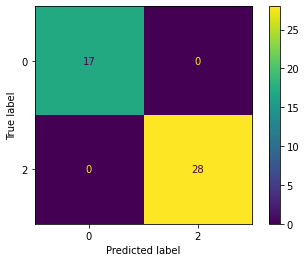

In [44]:
plot_confusion_matrix(svm_model, xtrain, ytrain)

In [45]:
accuracy_score(ypred, ytest)

0.8666666666666667

In [46]:
f1_score(ypred, ytest, average= 'weighted')

0.8948717948717948

In [47]:
from joblib import dump
dump(svm_model, 'svm_classifier2')

['svm_classifier2']

In [49]:
images = []
labels = []
files = os.listdir(r'processed_data2')
for proimg in files:
    image = io.imread(f'processed_data2\\{proimg}').ravel()/255
    label = int(proimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [58]:
Images = np.array([image for image in images])
Labels = np.array(labels)

In [59]:
from joblib import load
model = load('svm_classifier2')

In [60]:
ypred = model.predict(Images)
ypred == Labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [55]:
accuracy_score(ypred, ytest)

0.8666666666666667

In [57]:
f1_score(ypred, ytest, average= 'weighted')

0.8948717948717948